In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db_conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='M@hmudul162',
    database='totaldb'
)

cursor = db_conn.cursor()


## Basic Queries

### Question 1: List all unique cities where customers are located.

In [5]:
query = """ SELECT DISTINCT customer_city
            FROM customers; """
cursor.execute(query)

data = cursor.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

### Question 2: Count the number of orders placed in 2017.

In [11]:
query = """ SELECT COUNT(order_id)
            FROM orders 
            WHERE YEAR(order_purchase_timestamp) = '2017' """
cursor.execute(query)

data = cursor.fetchall()

print("Orders placed in 2017 are=", data[0][0])

Orders placed in 2017 are= 45101


### Question 3: Find the total sales per category.

In [17]:
query = """ SELECT products.product_category category,
ROUND(SUM(payments.payment_value),2) Total_sales
FROM products 
JOIN order_items on products.product_id = order_items.product_id
JOIN payments ON order_items.order_id = payments.order_id
GROUP BY category; """
cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data)
df.head()

,0,1
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33


### Question 4: Calculate the percentage of orders that were paid in installments.

In [14]:
query = """ SELECT (SUM(CASE WHEN payment_installments >= 1 then 1 ELSE 0 END))/COUNT(*)*100
FROM payments; """
cursor.execute(query)

data = cursor.fetchall()

data

[(Decimal('99.9981'),)]

### Question 5: Count the number of customers from each state.

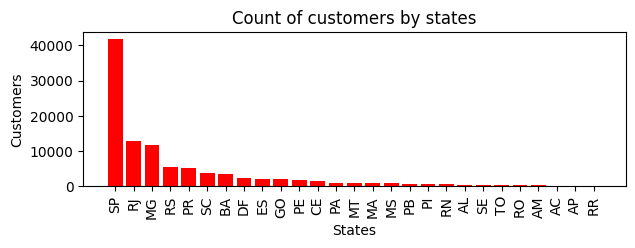

In [43]:
query = """ SELECT customer_state state, COUNT(customer_id) customers
FROM customers
GROUP BY customer_state; """
cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns = ["state", "customers"])
df = df.sort_values(by= "customers", ascending = False)

plt.figure(figsize = (7,2))
plt.bar(df["state"], df["customers"], color = "red")
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("Customers")
plt.title("Count of customers by states")
plt.show()

## Intermediate Queries

### Ques 1: Calculate the number of orders per month in 2018.

In [39]:
query = """ SELECT MONTHNAME(order_purchase_timestamp) Months, COUNT(order_id) Orders
FROM orders
WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY Months; """
cursor.execute(query)

data = cursor.fetchall()

data

[('July', 6292),
 ('August', 6512),
 ('February', 6728),
 ('June', 6167),
 ('March', 7211),
 ('January', 7269),
 ('May', 6873),
 ('April', 6939),
 ('September', 16),
 ('October', 4)]

### Ques 2: Find the average number of products per order, grouped by customer city.

In [46]:
query = """ WITH count_per_table as (SELECT orders.order_id, orders.customer_id, COUNT(order_items.order_id) as oc
FROM orders
JOIN order_items ON orders.order_id = order_items.order_id
GROUP BY orders.order_id, orders.customer_id)
SELECT customers.customer_city, ROUND(AVG(count_per_table.oc),2) avg_orders
FROM customers 
JOIN count_per_table ON customers.customer_id = count_per_table.customer_id
GROUP BY customers.customer_city; """
cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns=["Customer city", "Average products per order"])
df.head()

,Customer city,Average products per order
0,sao paulo,1.16
1,sao jose dos campos,1.14
2,porto alegre,1.17
3,indaial,1.12
4,treze tilias,1.27


### Ques 3: Calculate the percentage of total revenue contributed by each product category.

In [50]:
query = """ SELECT products.product_category  category, 
ROUND((SUM(payments.payment_value)/(SELECT SUM(payment_value) FROM payments))*100, 2) revenue
FROM payments
JOIN order_items ON payments.order_id = order_items.order_id
JOIN products ON order_items.product_id = products.product_id
GROUP BY category;  """
cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Category","Revenue"])
df

,Category,Revenue
0,perfumery,3.17
1,Furniture Decoration,8.93
2,telephony,3.04
3,bed table bath,10.70
4,automotive,5.32
...,...,...
69,cds music dvds,0.01
70,La Cuisine,0.02
71,Fashion Children's Clothing,0.00
72,PC Gamer,0.01


### Ques 4: Identify the correlation between product price and the number of times a product has been purchased.

In [55]:
query = """ SELECT products.product_category, 
COUNT(order_items.product_id), ROUND(AVG(order_items.price), 2)
FROM products
JOIN order_items ON products.product_id = order_items.product_id
GROUP BY products.product_category;  """
cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Category","Order Count", "Average Price"])

arr1 = df["Order Count"]
arr2 = df["Average Price"]
np.corrcoef([arr1, arr2])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

### Ques 5: Calculate the total revenue generated by each seller, and rank them by revenue.


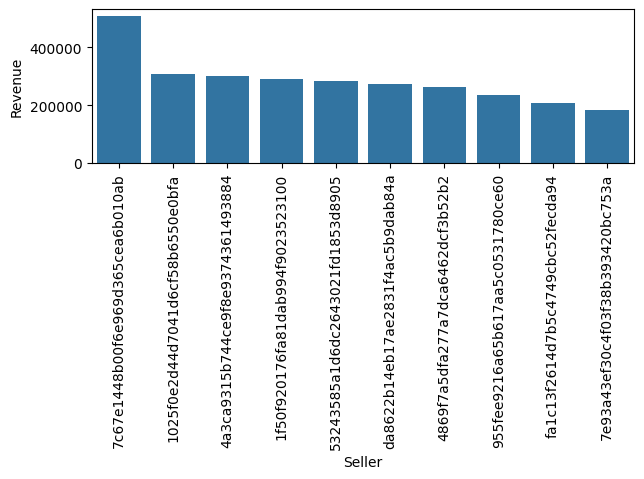

<Figure size 700x200 with 0 Axes>

In [66]:
query = """ SELECT *, DENSE_RANK() OVER(ORDER BY Revenue DESC)
FROM (SELECT order_items.seller_id Seller, ROUND(SUM(payments.payment_value), 2) Revenue
FROM order_items
JOIN payments ON order_items.order_id = payments.order_id
GROUP BY Seller) AS SubQuery;  """
cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Seller","Revenue", "Rank"])
df = df.head(10)

plt.figure(figsize = (7,2))
sns.barplot(x = "Seller", y="Revenue", data=df)
plt.xticks(rotation = 90)
plt.figure(figsize = (7,2))
plt.show()


## Advance Queries

### Ques 1: Calculate the moving average of order values for each customer over their order history.

In [75]:
query = """ SELECT customer_id, order_purchase_timestamp, payment_value, AVG(payment_value) 
OVER(
PARTITION BY customer_id
ORDER BY order_purchase_timestamp
ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
) AS moving_avg
FROM
(SELECT orders.customer_id, orders.order_purchase_timestamp, payments.payment_value
FROM orders
JOIN payments ON orders.order_id = payments.order_id) AS Sub; """

cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Customer","Purchase Time", "Payment", "Moving Avg."])
df.head(10)

,Customer,Purchase Time,Payment,Moving Avg.
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,71.80,71.800003
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,49.40,49.400002
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,166.59,166.589996
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,85.23,85.230003
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1255.71,1255.709961


### Ques2: Calculate the cumulative sales per month for each year.

In [2]:
query = """ SELECT Years, Months, Payments, ROUND(SUM(Payments)
OVER(ORDER BY Years, Months), 2) AS Cumulative_sales
FROM
(SELECT YEAR(orders.order_purchase_timestamp) AS Years,
MONTH(orders.order_purchase_timestamp) AS Months,
ROUND(SUM(payments.payment_value), 2) AS Payments 
FROM orders
JOIN payments ON orders.order_id = payments.order_id
GROUP BY Years, Months) AS sub; """

cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Years","Months", "Payments", "Cumulative Sales"])
df.head(10)

,Years,Months,Payments,Cumulative Sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


### Ques 3: Calculate the year-over-year growth rate of total sales.

   Years       Sales  Growth Rate
0   2016    59362.34          NaN
1   2017  7249746.73      12112.7
2   2018  8699763.05         20.0


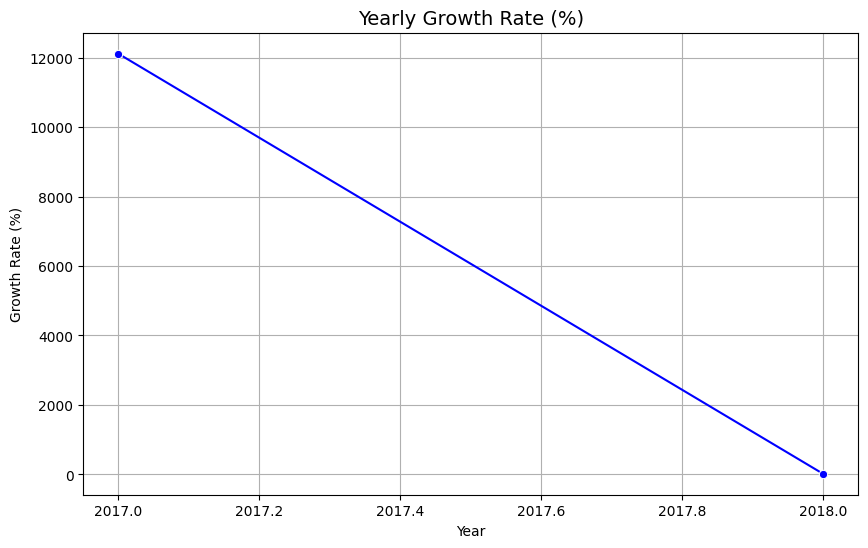

In [24]:
query = """ SELECT Years, Payments, 
ROUND(((Payments - (LAG(Payments, 1) OVER( ORDER BY Years)))/(LAG(Payments, 1) OVER( ORDER BY Years)))*100, 2) AS Growth FROM
(SELECT YEAR(orders.order_purchase_timestamp) AS Years,
ROUND(SUM(payments.payment_value), 2) AS Payments 
FROM orders
JOIN payments ON orders.order_id = payments.order_id
GROUP BY Years
ORDER BY Years) AS SUB;"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Years", "Sales", "Growth Rate"])
print(df)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Years', y='Growth Rate', marker='o', color='blue')
plt.title('Yearly Growth Rate (%)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()


### Ques 4:  Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [3]:
query = """ WITH a AS (
    SELECT 
        c.customer_unique_id AS Customers,
        MIN(o.order_purchase_timestamp) AS first_order
    FROM customers c
    JOIN orders o ON c.customer_id = o.customer_id
    GROUP BY c.customer_unique_id
),
b AS (
    SELECT 
        a.Customers,
        COUNT(DISTINCT o.order_id) AS next_order
    FROM a
    LEFT JOIN customers c ON a.Customers = c.customer_unique_id
    LEFT JOIN orders o ON c.customer_id = o.customer_id
        AND o.order_purchase_timestamp > a.first_order
        AND o.order_purchase_timestamp <= DATE_ADD(a.first_order, INTERVAL 6 MONTH)
    GROUP BY a.Customers
)
SELECT 
    ROUND(100 * (SUM(CASE WHEN b.next_order > 0 THEN 1 ELSE 0 END) / COUNT(DISTINCT a.Customers)), 2) AS Retention_rate
FROM a
LEFT JOIN b ON a.Customers = b.Customers; """

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Retention Rate"])
df

,Retention Rate
0,2.32


 ### Ques 5: Identify the top 3 customers who spent the most money in each year.

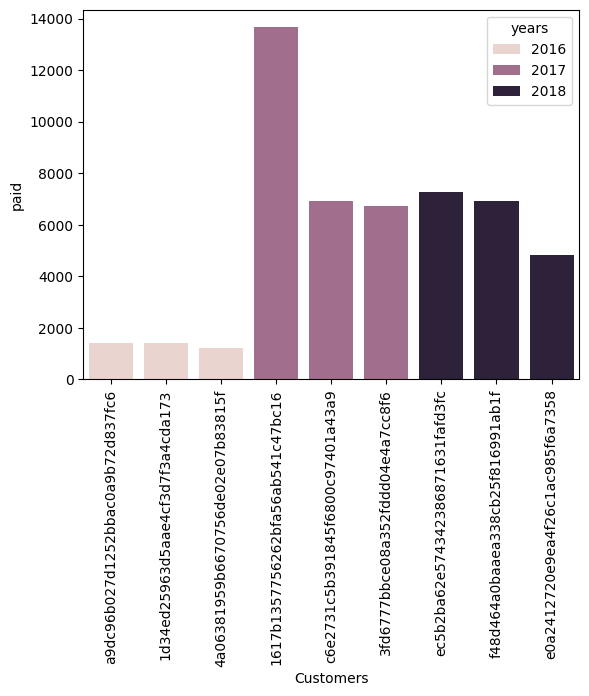

In [9]:
query = """ SELECT Customers, year, paid, ranking
FROM
(SELECT orders.customer_id Customers, YEAR(orders.order_purchase_timestamp) year, ROUND(SUM(payments.payment_value), 2) paid,
DENSE_RANK() OVER(PARTITION BY YEAR(orders.order_purchase_timestamp) ORDER BY SUM(payments.payment_value) DESC) ranking
FROM orders
JOIN payments ON orders.order_id = payments.order_id
GROUP BY orders.customer_id, orders.order_purchase_timestamp) AS sub
WHERE ranking <= 3; """

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Customers","years", "paid","ranking"])
sns.barplot(x = "Customers", y="paid", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()